In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/Dataset/metadata.csv")

In [ ]:
# Count the number of clean and dirty roads
count = df["label"].value_counts()
print(count)

1    124
0    113
Name: label, dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,filename,label
0,dirty_2.jpg,1
1,clean_36.jpg,0
2,clean_31.jpg,0
3,dirty_69.jpg,1
4,clean_113.jpg,0
5,clean_102.jpg,0
6,clean_43.jpg,0
7,dirty_27.jpg,1
8,dirty_53.jpg,1
9,clean_55.jpg,0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


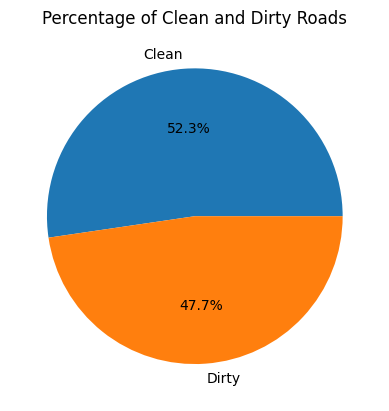

In [ ]:
# Create a pie chart
plt.pie(count, labels=["Clean", "Dirty"], autopct="%1.1f%%")
plt.title("Percentage of Clean and Dirty Roads")
plt.show()

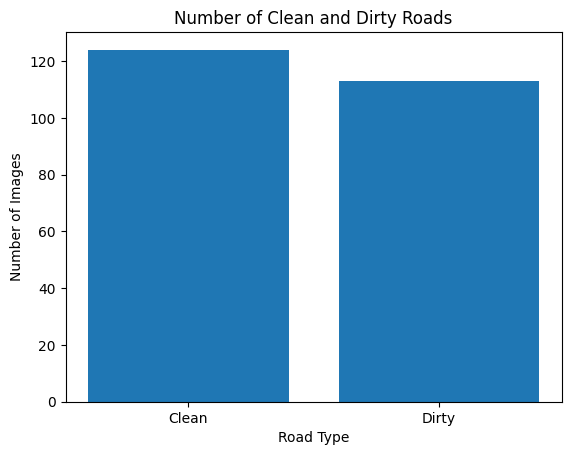

In [ ]:
# Create a bar chart
plt.bar(["Clean", "Dirty"], count)
plt.title("Number of Clean and Dirty Roads")
plt.xlabel("Road Type")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
import gym
import numpy as np
import cv2
import os

# Define the environment
class RoadEnvironment(gym.Env):
    def __init__(self, img_dir):
        self.observation_space = gym.spaces.Discrete(2) # 0 = clean, 1 = dirty
        self.action_space = gym.spaces.Discrete(2) # 0 = clean, 1 = dirty
        self.state = None
        self.reward_range = (-1, 1)
        self.current_step = 0
        self.img_dir = img_dir
        self.img_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir)])
        self.max_steps = len(self.img_paths)
        
    def reset(self):
        self.current_step = 0
        self.state = 0 if "clean" in self.img_paths[self.current_step] else 1
        return self.state
        
    def step(self, action):
        if action == 0:
            reward = 1 if self.state == 0 else -1
        else:
            reward = 1 if self.state == 1 else -1
            
        self.current_step += 1
        done = self.current_step >= self.max_steps
        if not done:
            self.state = 0 if "clean" in self.img_paths[self.current_step] else 1
        next_state = self.state
        return next_state, reward, done, {}

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=1.0):
        self.q_table = np.zeros((2, 2))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
    def act(self, state):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.q_table.shape[1])
        else:
            q_values = self.q_table[state, :]
            action = np.argmax(q_values)
        return action
    
    def learn(self, state, action, reward, next_state, done):
        q_next_max = np.max(self.q_table[next_state, :])
        q_current = self.q_table[state, action]
        q_new = q_current + self.alpha * (reward + self.gamma * q_next_max - q_current)
        self.q_table[state, action] = q_new
        
        if done:
            self.epsilon *= 0.99


In [ ]:
# Initialize the environment and agent
img_dir = "/content/drive/MyDrive/Deep Learning/Dataset/images"
env = RoadEnvironment(img_dir)
agent = QLearningAgent()

# Train the agent
episodes = 1000
for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        
    print(f"Episode: {episode + 1}/{episodes}, Total Reward: {total_reward}")

Episode: 1/1000, Total Reward: -1
Episode: 2/1000, Total Reward: 1
Episode: 3/1000, Total Reward: -1
Episode: 4/1000, Total Reward: -1
Episode: 5/1000, Total Reward: 1
Episode: 6/1000, Total Reward: 1
Episode: 7/1000, Total Reward: -1
Episode: 8/1000, Total Reward: -1
Episode: 9/1000, Total Reward: -1
Episode: 10/1000, Total Reward: -1
Episode: 11/1000, Total Reward: -1
Episode: 12/1000, Total Reward: -1
Episode: 13/1000, Total Reward: -1
Episode: 14/1000, Total Reward: 1
Episode: 15/1000, Total Reward: -1
Episode: 16/1000, Total Reward: -1
Episode: 17/1000, Total Reward: -1
Episode: 18/1000, Total Reward: 1
Episode: 19/1000, Total Reward: -1
Episode: 20/1000, Total Reward: 1
Episode: 21/1000, Total Reward: 1
Episode: 22/1000, Total Reward: -1
Episode: 23/1000, Total Reward: 1
Episode: 24/1000, Total Reward: -1
Episode: 25/1000, Total Reward: 1
Episode: 26/1000, Total Reward: 1
Episode: 27/1000, Total Reward: 1
Episode: 28/1000, Total Reward: 1
Episode: 29/1000, Total Reward: -1
Episod

In [ ]:
# Test the agent on a new image
new_img_path = "/content/drive/MyDrive/Deep Learning/Dataset/images/test_clean.jpg"
new_state = 0 if "clean" in new_img_path else 1
action = agent.act(new_state)
if action == 0:
  prediction = "Clean"
else:
  prediction = "Dirty"
print(f"The Road is: {prediction}") 

The Road is: Clean


In [ ]:
# Test the agent
total_correct = 0
total_tests = 100

for i in range(total_tests):
    state = env.reset()
    done = False
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        
    prediction = state
    actual = 0 if env.current_step < len(env.img_paths) and "clean" in env.img_paths[env.current_step] else 1
    total_correct += int(prediction == actual)
    
accuracy = total_correct / total_tests
print(f"Accuracy: {accuracy}")


Accuracy: 1.0
